In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = r"C:\Data Sets\Teeth DataSet\Teeth_Dataset\Training"
val_path = r"C:\Data Sets\Teeth DataSet\Teeth_Dataset\Validation"

# Create an ImageDataGenerator instance for preprocessing & augmentation
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip=True,  
    validation_split=0.1
)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "sparse",
)

val_generator = datagen.flow_from_directory(
    val_path,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "sparse",
)


print("Class indices:", train_generator.class_indices)
print("Class indices:", val_generator.class_indices)

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Class indices: {'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}
Class indices: {'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}


In [6]:
from tensorflow.keras import layers, models

model = models.Sequential([

    # First Block
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    # Second Block
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    # Third Block
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    # Fourth Block
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    # Global Average Pooling
    layers.GlobalAveragePooling2D(),

    # Fully Connected Layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(7, activation='softmax')
])

C:\Users\mehab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             

 Total params: 1,266,311 (4.83 MB)

 Trainable params: 1,264,455 (4.82 MB)

 Non-trainable params: 1,856 (7.25 KB)

In [11]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 30
)

Epoch 1/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.2584 - loss: 1.9796 - val_accuracy: 0.1449 - val_loss: 2.2529
Epoch 2/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.3287 - loss: 1.6882 - val_accuracy: 0.1449 - val_loss: 3.6617
Epoch 3/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.3889 - loss: 1.5927 - val_accuracy: 0.1449 - val_loss: 4.6799
Epoch 4/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.4280 - loss: 1.5228 - val_accuracy: 0.1712 - val_loss: 3.0530
Epoch 5/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.4411 - loss: 1.4500 - val_accuracy: 0.3317 - val_loss: 1.9389
Epoch 6/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.4563 - loss: 1.4115 - val_accuracy: 0.3424 - val_loss: 2.0064
Epoch 7/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.5046 - loss: 1.3305 - val_accuracy: 0.4066 - val_loss: 1.5646
Epoch 8/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.5251 - loss: 1.2504 - val_accuracy: 0.4942 - v

In [12]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.2f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 509ms/step - accuracy: 0.8463 - loss: 0.4304
Validation Accuracy: 0.85


In [14]:
model.save("teeth_cnn.keras")
loaded_model = tf.keras.models.load_model("teeth_cnn.keras")

In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_teeth(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    
    print(f"Predicted Class: {list(train_generator.class_indices.keys())[class_index]}")
    print(f"Predicted Label Index: {class_index}")


predict_teeth(r"C:\Data Sets\Teeth DataSet\Teeth_Dataset\Testing\OC\oc_1213.jpg", loaded_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted Class: OC
Predicted Label Index: 4


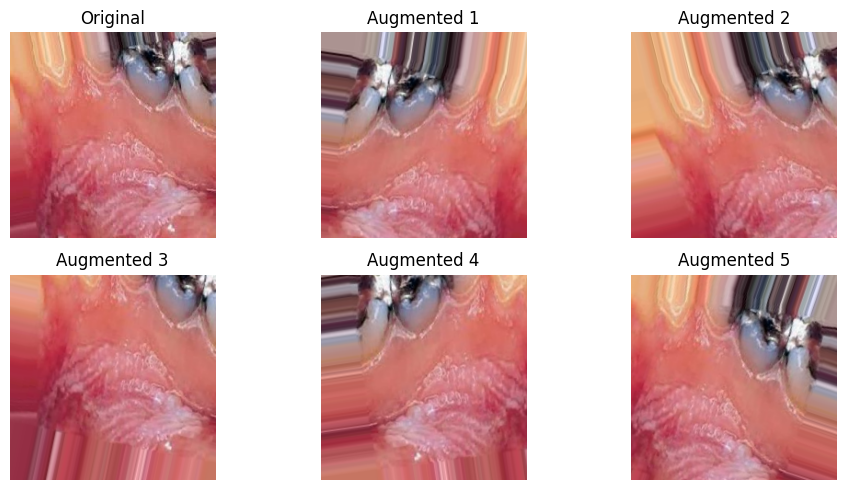

In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os
import random

# Pick a random class
class_name = random.choice(list(train_generator.class_indices.keys()))  # Randomly select a class
class_path = os.path.join(train_path, class_name)  # Get the class directory

if os.path.exists(class_path) and os.listdir(class_path):
    img_filename = random.choice(os.listdir(class_path))  # Randomly pick an image from the selected class
    img_path = os.path.join(class_path, img_filename)  # Get the full image path

# Load the original image
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img) # Normalize between 0 and 1
img_array = np.expand_dims(img_array, axis=0)

# Generate augmented images
aug_iter = datagen.flow(img_array, batch_size=1)

# Plot original & augmented images
plt.figure(figsize=(10, 5))

# Show Original Image (Convert back to 0-255)
plt.subplot(2, 3, 1)
plt.imshow((img_array[0]).astype("uint8"))  # Convert to 0-255
plt.title("Original")
plt.axis("off")

# Show 5 Augmented Images (Unnormalize)
for i in range(5):
    aug_img = next(aug_iter)[0]  # Get augmented image
    aug_img = (aug_img * 255).astype("uint8")  # Convert to 0-255
    plt.subplot(2, 3, i+2)
    plt.imshow(aug_img)
    plt.title(f"Augmented {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()
